<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>

# PyLizard<a id="top"></a>
_developed by Davíd Brakenhoff & Onno Ebbens_
<hr>

This notebook shows some of the basic functionality of the PyLizard module (developed by Sjoerd Rijpkema from Vitens). PyLizard provides access to data stored within a Lizard database, which can be accessed as a webservice through an API.
    
### Contents
1. [Installing pylizard](#1)
3. [Overview of available functionality](#2)
4. [The Peilbuis object](#3)
5. [Getting multiple piezometers](#4)

### 1. [Installing PyLizard](#top)<a id="1"></a>

PyLizard is not available as a Python package from the most common sources (PyPi, conda) so unfortunately installing the package is a little bit more complicated. The following steps describe the process:
1. Download the [PyLizard GitHub repository](https://github.com/Vitens/pylizard/archive/master.zip). Save an extract the zipfile in a convenient location for you.
2. Open the Anaconda Prompt (typing "Anaconda" after opening the Start Menu should help you find it).
3. Navigate to the location you extracted the downloaded zipfile: ` cd <your path here>\pylizard-master`. The directory you're in should contain a file called `setup.py`.
4. In Anaconda Prompt type `pip install -e .`  Wait for the command to complete, some packages will be downloaded and installed. When finished, congrats, you've installed PyLizard in your current Python environment.

_Note: Installing a package with the method described above creates a link in the Anaconda directory to this package. Moving the extracted directory will cause the installation to break. Any changes to the files within the extracted directory are essentially changes to the package itself._

Now try to import the package:

In [1]:
import matplotlib.pyplot as plt
import pylizard

### 2. [Overview of available functionality](#top)<a id="2"></a>

PyLizard is quite a simple module containing a Peilbuis object that can be used to download data for one piezometer through the Lizard webservice. There are also two helper functions.
- `pylizard.Peilbuis()`: class that makes it easy to get the data for a specific piezometer and filter.
- `pylizard.pnt2buis()`: this function returns a pandas DataFrame (a table) of piezometers within a certain distance of a point (X, Y).
- `pylizard.get_timeseries()`: this function returns the measurements (both for measurements done by hand and obtained with a logger) as a pandas DataFrame (a table).

_Note: Unfortunately the documentation of these functions and objects is lacking. The [examples](https://github.com/Vitens/pylizard/tree/master/example) however, are helpful in explaining how these functions and objects work._

### 3. [The Peilbuis object](#top)<a id="3"></a>

Let's define a piezometer location and filter number:

In [2]:
peilbuiscode, filternummer = '16FL0041', 1

Create a Peilbuis object by passing the location ID and filter number to the Peilbuis object:

In [3]:
p = pylizard.Peilbuis(peilbuiscode, filternummer)

The Peilbuis object contains information about the piezometer and the data. Metadata can be viewed as follows:

In [4]:
"Piezometer {0}-{1} is located at (x={2:.0f}, y={3:.0f}), with a filter elevation between NAP {4:+.2f} m and NAP {5:+.2f} m.".format(p.code, p.filt, p.x, p.y, p.bkf, p.okf)

'Piezometer 16FL0041-1 is located at (x=219990, y=549690), with a filter elevation between NAP +3.63 m and NAP +4.63 m.'

The Peilbuis object also has two methods:
- `p.head_total()`: this method retrieves the data and performs some filling and resampling logic depending on the method that is selected. The default is to combine hand and diver measurements and resample to daily data.
- `p.plot()`: this plots the data, has option to plot statistics (quantiles 6%, 50% and 94%) when `stats=True` is passed to the method.

Let's try to plot the data:

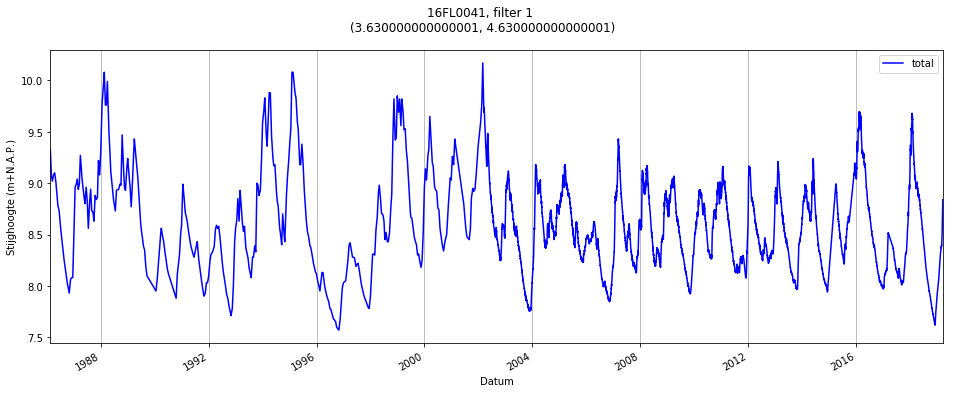

In [5]:
ax, = p.plot(figsize=(16, 6), stats=False)
ax.grid(b=True, axis="x")

The data used in the plot can be accessed through the following attributes: 
- `p.head_diver`: diver measurements
- `p.head_hand`: measurements performed by hand

In [6]:
p.head_diver.head()

datetime
2002-03-08 11:00:00    9.870
2002-03-09 11:00:00    9.879
2002-03-10 11:00:00    9.826
2002-03-11 11:00:00    9.807
2002-03-12 11:00:00    9.780
Name: diver, dtype: float64

In [7]:
p.head_hand.head()

datetime
1986-02-14 11:00:00    9.33
1986-02-28 11:00:00    9.07
1986-03-14 11:00:00    9.02
1986-03-28 11:00:00    9.08
1986-04-14 11:00:00    9.10
Name: hand, dtype: float64

### 3. [Getting multiple piezometers](#top)<a id="4"></a>

The function `pylizard.pnt2buis()` allows you to get all measurements within a certain distance of a point you provide. Let's get the X, Y coordinates from the previous piezometer and set a radius of 2000 meters.


In [8]:
distance = 2000.  # m
x, y = p.x, p.y
pbs = pylizard.pnt2buis(x, y, distance)

In [9]:
pbs

,buis,filt,x,y,lat,lon,surface_level,bkf,okf,uuid_hand,uuid_diver
11HL0003001,11HL0003,1,219355.000178,551587.000497,52.947482,6.344664,11.43,3.08,3.58,75bc18b6-74d8-4267-b09e-ee70f289081b,970d1982-a860-4486-8e8a-aca818963cb2
11HP0035002,11HP0035,2,219353.000178,551587.000497,52.947482,6.344635,11.46,30.06,31.06,201f1eab-017b-47bb-add2-68168daeea73,
11HP0035003,11HP0035,3,219353.000178,551587.000497,52.947482,6.344635,11.46,50.06,51.06,ee6aca3d-198b-459f-9ab6-cade9c976c6d,8a1433bd-6502-4800-96f1-cc825a5956f6
11HP0035001,11HP0035,1,219353.000178,551587.000497,52.947482,6.344635,11.46,8.00,9.00,1b72cc72-f1fa-47ec-8f45-8fe821864818,b5a12a65-47eb-44c0-92d1-7fe95b884b94
16FL0041001,16FL0041,1,219990.000179,549690.000496,52.930360,6.353732,11.31,3.63,4.63,d7a22d4c-deb0-4ac6-a9b0-876eed1b7b81,bf724d8e-110f-4b68-bb34-8bc980eaa026
11HL0085001,11HL0085,1,218690.000177,550665.000497,52.939276,6.334592,10.97,3.08,4.08,dd9b66df-47ed-43b8-bde7-d6df70ef1776,c1ad6dcb-8908-4b5d-b0f3-b987042783bf
16FL0046001,16FL0046,1,218790.000178,548970.000496,52.924034,6.335748,9.82,1.38,2.38,c8e8ab2b-1ebc-4417-a881-ad6a09366fc2,8f995b1b-21c3-4899-b13c-c44f13b02248


_Note: Only points with a value in the uuid_hand or uuid_diver columns have data._

Plot the locations of the piezometers on a not very interesting map:

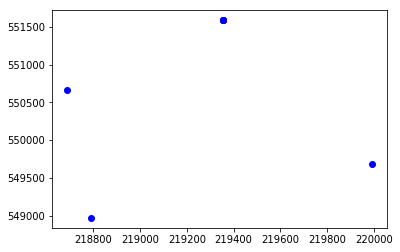

In [10]:
plt.plot(pbs.x, pbs.y, "bo")

Let's get the data from each of these piezometers using the `pylizard.get_timeseries()` function and plot the data on a new figure for each piezometer. The `pylizard.get_timeseries()` uses the uuid string to get the data. Add some logic to avoid errors when a uuid string is not available for a certain piezometer.

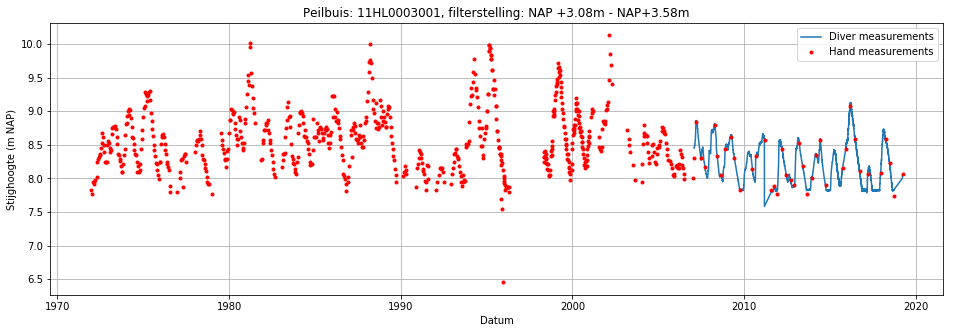

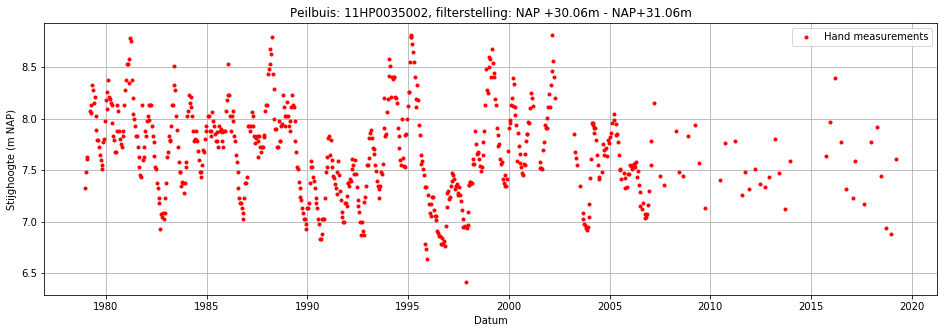

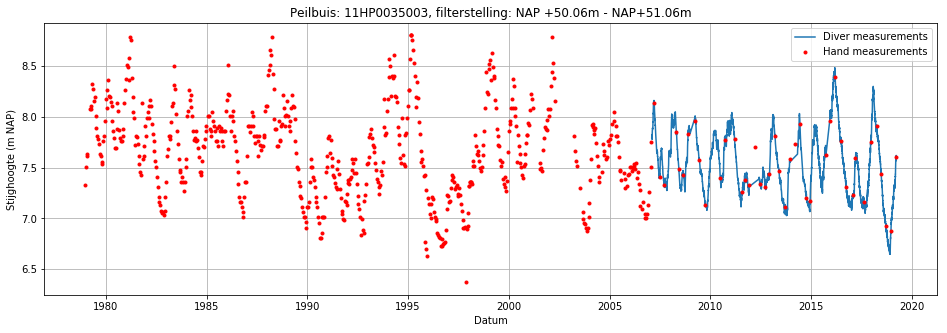

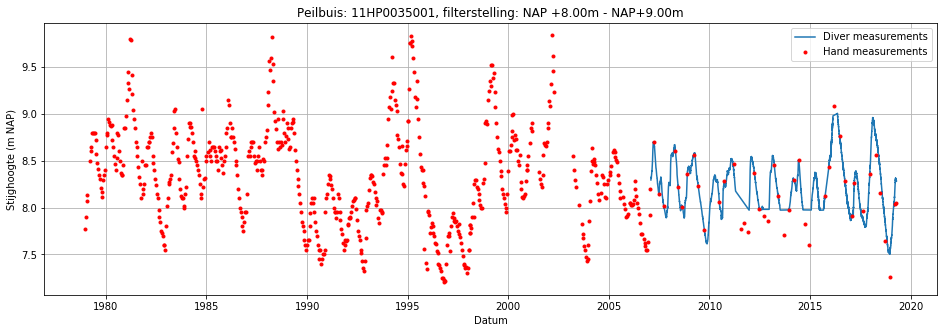

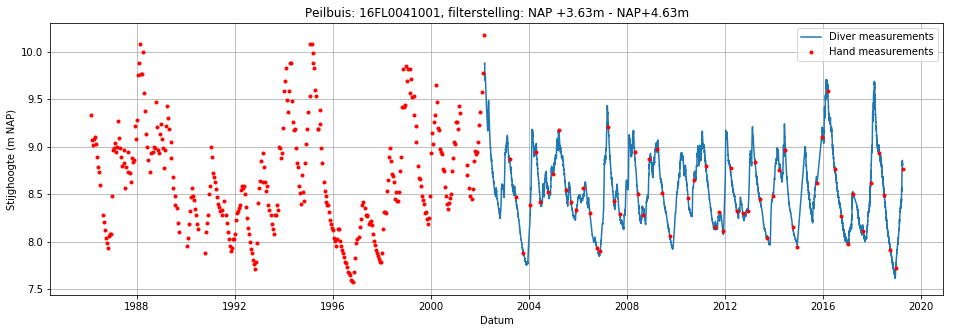

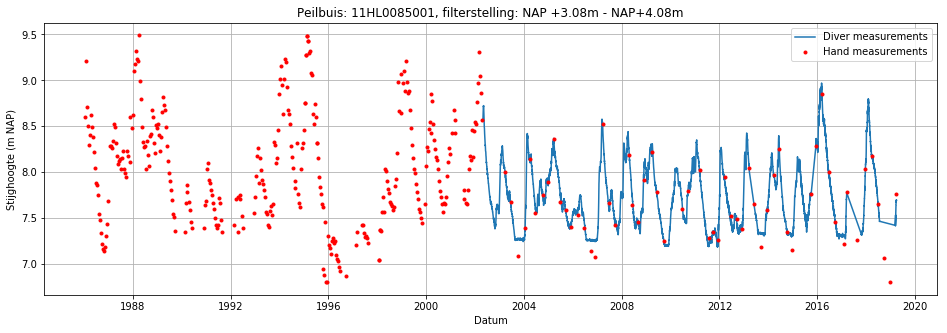

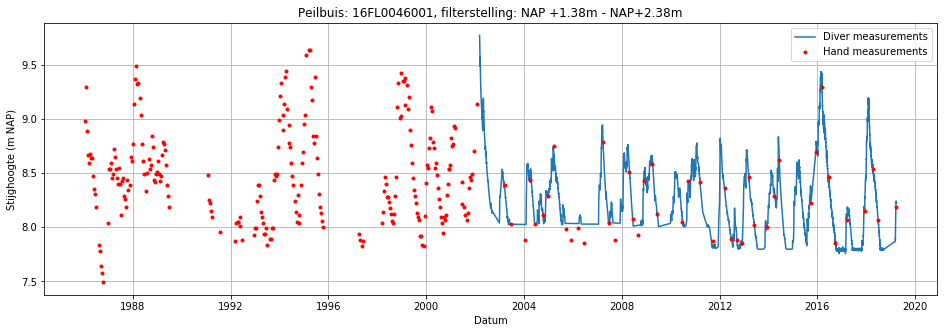

In [11]:
for name, irow in pbs.iterrows():
    
    # get timeseries if uuid is defined, else None
    if irow.uuid_diver != "":
        tsd = pylizard.get_timeseries(irow.uuid_diver)
    else:
        tsd = None
    if irow.uuid_hand != "":
        tsh = pylizard.get_timeseries(irow.uuid_hand)
    else:
        tsh = None
    
    # create a plot
    fig, ax = plt.subplots(1, 1, figsize=(16, 5))
    

    if tsd is not None:
        ax.plot(tsd.index, tsd, marker="", color="C0", label="Diver measurements")
    if tsh is not None:
        ax.plot(tsh.index, tsh, marker=".", color="r", label="Hand measurements", ls="")
        
    ax.grid(b=True)
    ax.legend(loc="best")
    ax.set_ylabel("Stijghoogte (m NAP)")
    ax.set_xlabel("Datum")
    ax.set_title("Peilbuis: {0}, filterstelling: NAP {1:+.2f}m - NAP{2:+.2f}m".format(name, irow.bkf, irow.okf))